In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day0.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PN

**IMPORTING LIBRARIES**

In [2]:
import tensorflow as tf
import cv2 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

**CHECKING IMAGES FOR CONFIRMATION**

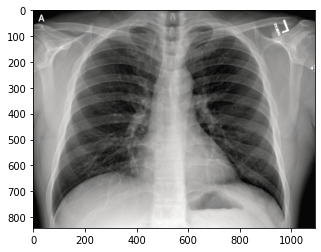

In [3]:
plt.imshow(cv2.imread("/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA/nejmoa2001191_f1-PA.jpeg"))

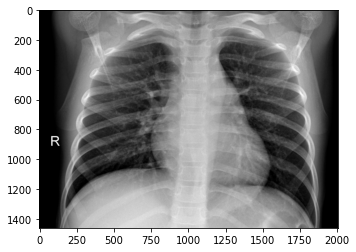

In [4]:
plt.imshow(cv2.imread("/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL/IM-0086-0001.jpeg"))

**PART-1 DATA PREPROCESSING**

**TRAINING DATASET INTO TRAINING AND VALIDATION SET**

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 148 images belonging to 2 classes.


**PREPROCESSING THE VALIDATION SET**

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(
    "/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test", # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 40 images belonging to 2 classes.


**PART-2 BUILDING THE CNN**

**INITIALISING THE CNN**

In [7]:
cnn = tf.keras.models.Sequential()

**STEP-1 CONVOLUTION**

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

**STEP-2 POOLING**

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**ADDING A SECOND CONVOLTION LAYER**

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**STEP-3 FLATTENING**

In [11]:
cnn.add(tf.keras.layers.Flatten())

**STEP-4 FULL CONNECTION**

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**STEP-5 OUTPUT LAYER**

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**PART-3 TRAINING THE CNN**

**COMPILING THE CNN**

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**TRAINING THE CNN ON THE TRAINING SET AND EVALUATING THE VALIDATION SET**

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
5/5 [==============================] - 11s 2s/step - loss: 0.8527 - accuracy: 0.4082 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 2/25
5/5 [==============================] - 5s 1s/step - loss: 0.6873 - accuracy: 0.4956 - val_loss: 0.6385 - val_accuracy: 0.9250
Epoch 3/25
5/5 [==============================] - 5s 987ms/step - loss: 0.6461 - accuracy: 0.7698 - val_loss: 0.5733 - val_accuracy: 1.0000
Epoch 4/25
5/5 [==============================] - 5s 1s/step - loss: 0.6044 - accuracy: 0.8000 - val_loss: 0.4547 - val_accuracy: 0.9750
Epoch 5/25
5/5 [==============================] - 5s 1s/step - loss: 0.5140 - accuracy: 0.7976 - val_loss: 0.3890 - val_accuracy: 0.8750
Epoch 6/25
5/5 [==============================] - 6s 1s/step - loss: 0.4889 - accuracy: 0.7293 - val_loss: 0.2167 - val_accuracy: 0.9750
Epoch 7/25
5/5 [==============================] - 5s 1s/step - loss: 0.4105 - accuracy: 0.8308 - val_loss: 0.2622 - val_accuracy: 0.8750
Epoch 8/25
5/5 [=====================

**PART-4 MAKING A SINGLE PREDICTION**

In [16]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'covid risk'
else:
  prediction = 'normal'

In [17]:
print(prediction)

covid risk
